# Lecture 1c: Unsupervised Learning and Clustering Approaches
This lecture introduces the first unsupervised learning approaches we will explore: k-means clustering and self-organizing maps. We will use these algorithms to identify hidden patterns and structures in data without explicit guidance.

The key concepts covered in this lecture include:
* __Unsupervised learning__: is a type of machine learning that involves training algorithms on unlabeled data. Unsupervised learning aims to identify patterns and structures in data without explicit guidance. 
Unsupervised learning is particularly useful when dealing with large volumes of unstructured data or when the desired outcomes are unknown.
* __Clustering__: is a typical unsupervised learning technique that involves dividing a dataset into distinct groups, or clusters, based on the similarity of data points. Clustering algorithms aim to group data points that are more similar to each other than to those in different clusters.
* __K-means clustering__ is a popular and straightforward clustering algorithm that partitions a dataset into $k$ clusters. 
The algorithm iteratively assigns data points to the nearest cluster center and updates the cluster centers based on the mean of the assigned points.
* __Self-organizing maps (SOMs)__: are another unsupervised learning algorithm that uses a neural network to map high-dimensional data onto a lower-dimensional grid.

Lecture notes can be found: [here!](docs/Notes.pdf)

## Background: What is unsupervised learning and clustering?
Unsupervised learning is a branch of machine learning that deals with unlabeled data, aiming to discover hidden patterns and structures without predefined target variables. One of the most important tasks in unsupervised learning is clustering.

* __What is Clustering?__ Clustering is an unsupervised machine learning technique that organizes data points into groups, or clusters, based on their similarities without prior knowledge of the group memberships. This method is widely used for exploratory data analysis, enabling the discovery of patterns and relationships within complex datasets.

### Clustering approaches
Today, we'll consider [the k-means algorithm](https://en.wikipedia.org/wiki/K-means_clustering), arguably the most straightforward clustering algorithm. While relatively straightforward, we see that [k-means](https://en.wikipedia.org/wiki/K-means_clustering) has some shortcomings. Thus, in addition to the [k-means approach](https://en.wikipedia.org/wiki/K-means_clustering) there are several other algorithms:
* __Hierarchical clustering__ is an unsupervised machine learning technique that organizes data points into a tree-like structure of nested clusters, allowing for the identification of relationships and patterns within the dataset. This method can be implemented through two main approaches: agglomerative, which merges individual points into larger clusters, and divisive, which splits a single cluster into smaller ones.
* __Density-based spatial clustering of applications with noise (DBSCAN)__ is a density-based clustering algorithm that groups closely packed data points while effectively identifying outliers, making it particularly useful for datasets with noise and clusters of arbitrary shapes. By defining clusters as dense regions separated by areas of lower density, DBSCAN can efficiently discover meaningful patterns in complex data distributions
* __Gaussian mixture models (GMMs)__ are probabilistic models that represent a dataset as a combination of multiple Gaussian distributions, each characterized by its mean and covariance, allowing for identifying underlying subpopulations within the data. This approach is useful in clustering and density estimation, providing a flexible framework for modeling complex, multimodal distributions.

## K-means clustering
The K-means algorithm, originally developed by [Lloyd in the 1950s but not published until much later in 1982](https://ieeexplore.ieee.org/document/1056489), is our first example of $\texttt{unsupervised learning}$. 
K-means is a popular unsupervised machine learning algorithm for clustering data points $\mathbf{x}\in\mathcal{D}$ (feature vectors) into a distinct set of groups (clusters) $\mathcal{C} = \left\{\mathcal{c}_{1},\dots,\mathcal{c}_{K}\right\}$ based on _similarity_.

__Key ideas__
* __Initialization__. You give the data set $\mathbf{x}\in\mathcal{D}$, which contains `n` data vectors (measurements, observations, etc) $\mathbf{x}_{1},\dots,\mathbf{x}_{n}$ where each vector $\mathbf{x}_{i}$ has `m` features, and the number and (initial) locations of K-clusters to the algorithm. Each cluster $\mathcal{c}_{k}$ is represented by a centroid, i.e., the mean of the set of data points in the cluster $\left\{\mathbf{x}_{i}\right\}_{i\in\mathcal{c}_{k}}$. In the K-means approach, you have to tell the algorithm how many clusters and the initial location of each cluster. This initial guess is then iteratively refined.
* __Update__. The K-means algorithm employs an iterative process wherein data points are assigned to the nearest cluster centroid, and the centroids are subsequently updated based on the mean of the assigned points. This iterative process continues until a predetermined stopping criterion is satisfied.
* __Stopping__. There are several ways the K-means algorithm can terminate. The stopping criteria for the K-means clustering algorithm include when the cluster centroids do not change significantly, when data points remain in the same clusters across iterations, or when a maximum number of iterations is reached.

### Prerequisites and data
We set up the computational environment by including the `Include.jl` file and then load any needed resources. Finally, we end by setting up any required constants. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our problem.

In [24]:
include("Include.jl");

In this lecture, we'll work with a [customer spending preferences dataset from Kaggle](https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data?select=Mall_Customers.csv). This dataset was created learning customer segmentation concepts, known as [market basket analysis](https://en.wikipedia.org/wiki/Market_basket). We will use [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) analysis to explore this data.

In [91]:
originaldataset = CSV.read(joinpath(_PATH_TO_DATA, "mall-customers-dataset.csv"), DataFrame)

Row,id,gender,age,income,spendingscore
,Int64,String7,Int64,Int64,Int64
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76
7,7,Female,35,18,6
8,8,Female,23,18,94
9,9,Male,64,19,3


Let's remap the `gender::String7` feature, which is a string, to a number, i.e., let `Male = -1` and `Female = 1.` It's much easier to use numbers than categorical data when looking at (and analyzing) this data later. We'll store the revised dataset in [the `dataset::DataFrame` variable](https://github.com/JuliaData/DataFrames.jl).
* __Note__: the original dataset did not include example shoppers that identified as non-binary, hence we transformed the `gender::String7` field to ${-1,1}$. However, if non-binary shoppers were to enter the dataset, we could map them to a different number, e.g., `0`.

In [30]:
dataset = let
    treated_dataset = copy(originaldataset);
    transform!(treated_dataset, :gender => ByRow( x-> (x=="Male" ? -1 : 1)) => :gender);
    treated_dataset 
end;

In [32]:
M = dataset[:,2:end] |> Matrix; # build a matrix, exclude the id col

#### Constants
Let's set some constants that we'll need in the examples below. See the comment next to the constant for a description of what it is, it's permissible values, etc.

In [36]:
n = nrow(dataset); # how many example data points do we have?
m = 4; # number of features
maxiter = 2000; # maximum iterations
K = 5; # number of clusters. Why do we pick 5?
ϵ = 0.0001; # tolerance for termination

Finally, let's set up the color dictionary for the visualizations in the lecture. The keys of the `my_color_dictionary::Dict{Int64,RGB}` dictionary are the cluster indexes, while the values are the colors mapped to that index.

In [39]:
my_color_dictionary = Dict{Int64,RGB}();
my_color_dictionary[1] = colorant"#03045e";
my_color_dictionary[2] = colorant"#0077b6";
my_color_dictionary[3] = colorant"#00b4d8";
my_color_dictionary[4] = colorant"#ffc300";
my_color_dictionary[5] = colorant"#e36414";

### Visualize
What does the consumer data look like? Let's plot different data views to see what we can see, e.g., are there obvious patterns or groups in the dataset?
* `Unhide` the code block below to see how we plotted the dataset using [the `Plots.jl` package](https://github.com/JuliaPlots/Plots.jl), and particularly the [`scatter(...)` function](https://docs.juliaplots.org/stable/api/#Plots.scatter-Tuple). An initial look at the data (`income` versus `spendingscore`) suggests that there are perhaps at least five groups (clusters) in the data. However, the groupings in other views, e.g., `age` versus `spendingscore` are not as obvious.

Specify the horizontal and vertical axes columns. Note the column names which are of [type `Symbol`](https://docs.julialang.org/en/v1/manual/metaprogramming/#Symbols), which is a special type unique string.

In [61]:
horizontal_column = :income; # x-axis
vertical_column = :spendingscore; # y-axis

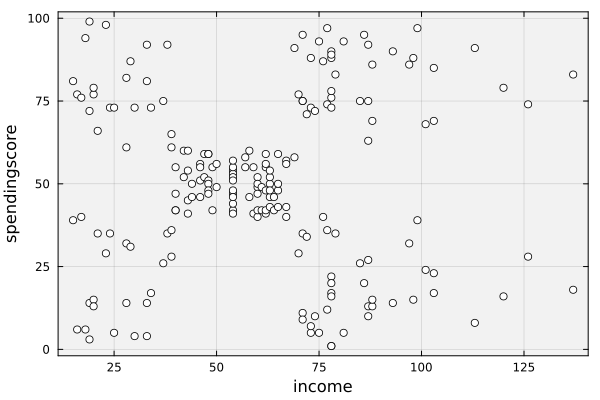

In [62]:
let
    
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); # make an empty plot, styled the way we like
    scatter!(dataset[:, horizontal_column], dataset[:, vertical_column], label="", mec=:navy, c=:white)
    xlabel!("$(String(horizontal_column))");
    ylabel!("$(String(vertical_column))");
end

### Implementation
Now that we understand the basics of the algorithm and some data to play with, let's sketch a pseudo-code implementation and then translate it into an actual implementation in [Julia](https://julialang.org/). We'll then use our implementation to explore the customer spending dataset. Check out the [pseudo-code here!](figs/pcode-kmeans.pdf).

We've developed a [initial k-means implementation](src/Cluster.jl) based on the [pseudo-code](figs/pcode-kmeans.pdf). Let's explore how this implementation performs on our sample dataset. 
* First, let's build [a `MyNaiveKMeansClusteringAlgorithm` instance](src/Types.jl), which holds information about the clustering, i.e., `K` the number of clusters, and some information about the dataset such as the number of features `m`, and the number of points `n,` etc. we'll save this model in the `model::MyNaiveKMeansClusteringAlgorithm` variable.

In [64]:
model = build(MyNaiveKMeansClusteringAlgorithm, (
        maxiter = maxiter,
        dimension = m,
        number_of_points = n,
        K = K,
        ϵ = ϵ,
        scale_factor = 1.0, # scale of the data
));

Fill me in about what is in the model

#### Visualize the initial centroids and assignments
Fill me in

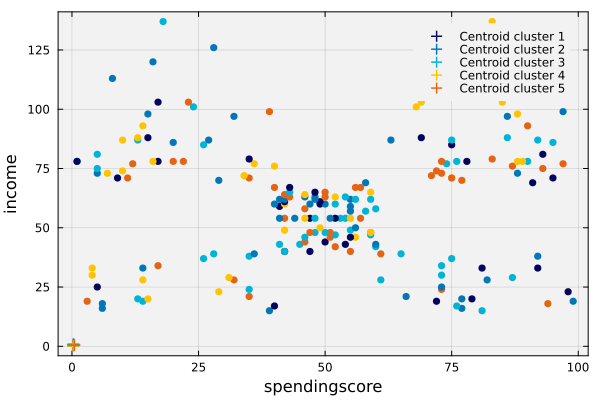

In [67]:
let

    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); # make an empty plot
    horizontal_column = :spendingscore
    vertical_column = :income
    horizontal_index = findfirst(x-> x == String(horizontal_column), names(dataset)) - 1; # correct for the id col
    vertical_index = findfirst(x-> x == String(vertical_column), names(dataset)) - 1; # correct for the id col
    
    assignments = copy(model.assignments);
    for i ∈ eachindex(assignments);
        a = assignments[i];        
        scatter!([dataset[i, horizontal_column]], [dataset[i, vertical_column]], label="", c=my_color_dictionary[a], msc=my_color_dictionary[a]);
    end
    current();

    # plot the centroids -
    centroids = copy(model.centroids);
    for k ∈ 1:K
        c = centroids[k]
        scatter!([c[horizontal_index]], [c[vertical_index]], label="Centroid cluster $(k)", msc=my_color_dictionary[k], c=my_color_dictionary[k], 
            ms=6, markerstrokewidth=2, markershape = :plus)
    end
    current();

    xlabel!("$(String(horizontal_column))");
    ylabel!("$(String(vertical_column))");
end

Describe the call to the cluster method

In [69]:
result = cluster(M, model, verbose = false); # cluster the data

Describe the final clustering

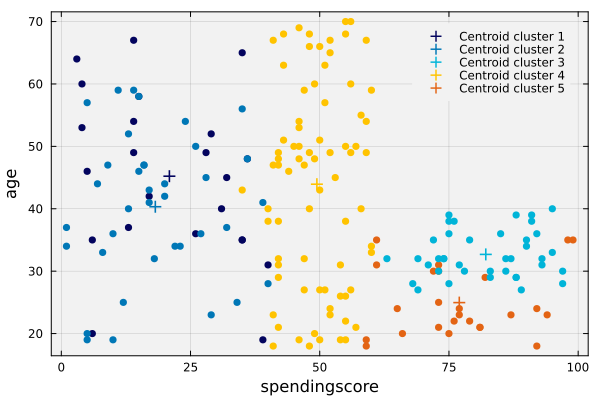

In [71]:
let

    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); # make an empty plot
    horizontal_column = :spendingscore
    vertical_column = :age
    horizontal_index = findfirst(x-> x == String(horizontal_column), names(dataset)) - 1; # correct for the id col
    vertical_index = findfirst(x-> x == String(vertical_column), names(dataset)) - 1; # correct for the id col
    
    assignments = result[1];
    for i ∈ eachindex(assignments);
        a = assignments[i];        
        scatter!([dataset[i, horizontal_column]], [dataset[i, vertical_column]], label="", c=my_color_dictionary[a], msc=my_color_dictionary[a]);
    end
    current();

    # plot the centroids -
    centroids = result[2];
    for k ∈ 1:K
        c = centroids[k]
        scatter!([c[horizontal_index]], [c[vertical_index]], label="Centroid cluster $(k)", msc=my_color_dictionary[k], c=my_color_dictionary[k], 
            ms=6, markerstrokewidth=2, markershape = :plus)
    end
    current();

    xlabel!("$(String(horizontal_column))");
    ylabel!("$(String(vertical_column))");
end

### Extra: Do you want to watch each iteration?
Fill me in

In [73]:
write_the_kmeans_movie_frames = false;

In [74]:
let

    if (write_the_kmeans_movie_frames == true)
    
        # get some data from the run -
        number_of_iterations = result[3]; # how many steps before we terminated
    
        # setup information for the plot -
        horizontal_column = :spendingscore
        vertical_column = :income
        horizontal_index = findfirst(x-> x == String(horizontal_column), names(dataset)) - 1; # correct for the id col
        vertical_index = findfirst(x-> x == String(vertical_column), names(dataset)) - 1; # correct for the id col
    
        for i ∈ 1:number_of_iterations
            data = load(joinpath(_PATH_TO_TMP, "data-$(i).jld2")); # load data for iteration i

            p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); # make an empty plot
            assignments = data["assignments"];
            for i ∈ eachindex(assignments);
                a = assignments[i];        
                scatter!([dataset[i, horizontal_column]], [dataset[i, vertical_column]], label="", c=my_color_dictionary[a], msc=my_color_dictionary[a]);
            end
    
            # plot the centroids -
            centroids = data["centroids"];
            for k ∈ 1:K
                c = centroids[k]
                scatter!([c[horizontal_index]], [c[vertical_index]], label="Centroid cluster $(k)", msc=my_color_dictionary[k], c=my_color_dictionary[k], 
                    ms=6, markerstrokewidth=2, markershape = :plus)
            end
            current();
            savefig(joinpath(_PATH_TO_FRAMES, "Tmp-$(i).pdf"))
            # IJulia.clear_output(true)
        end
    end
end

### What are the problems with k-means?
On this sample dataset, our k-means implementation seems to work ok. However, what are the problems with the approach we might encounter in practice with an arbitrary dataset? Let's explore a few of these issues:
* __Fixed (unspecified) number of clusters__. K-means requires the user to specify the number of clusters, $k$, in advance. This requirement poses a challenge, as choosing an inappropriate $k$ can lead to poor clustering results. For example, if $k$ is set too high, it may cause overfitting, where noise is regarded as distinct clusters. Conversely, setting $k$ too low may result in losing vital data structure.
* __Sensitivity to initial conditions__. The K-means method is sensitive to the initial placement of centroids. Our implementation randomly initializes cluster centers, and different initializations can lead to convergence at various clustering outcomes. This variability may affect the reproducibility of the clustering.
* __Sensitivity to outliers__. The presence of outliers can significantly compromise the accuracy of K-means clustering results. Outliers can skew the centroids' positions, resulting in misleading cluster assignments. Preprocessing steps may be required to address the impact of outliers.
* __Overlapping clusters__. In cases where clusters overlap, K-means does not have an intrinsic mechanism for handling uncertainty regarding which cluster a data point belongs to. This can result in ambiguous assignments and reduced clarity in cluster definitions. 